In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
import math, datetime
from scipy.stats import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
# from sklearn import cross_validation
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression

In [2]:
# Read the csv file into a pandas DataFrame
unemployment = pd.read_csv('../../Clean Data/pandas_cleaned/unemployment_rate_model_data.csv', header=0, 
                  index_col='date',
                  parse_dates=True)
unemployment.head()

,unemployment_rate,date.1
date,,
1948-01-01,3.3,1/1/1948
1948-04-01,3.3,4/1/1948
1948-07-01,3.3,7/1/1948
1948-10-01,3.4,10/1/1948
1949-01-01,4.1,1/1/1949


In [4]:
unemployment['date_1'] = pd.to_datetime([
     '-'.join(x.split()[::-1]) for x in unemployment['date.1']])

In [5]:
unemployment = unemployment.drop(columns = ["date.1"])

In [6]:
unemployment.head()

,unemployment_rate,date_1
date,,
1948-01-01,3.3,1948-01-01
1948-04-01,3.3,1948-04-01
1948-07-01,3.3,1948-07-01
1948-10-01,3.4,1948-10-01
1949-01-01,4.1,1949-01-01


In [3]:
unemployment.tail()

,unemployment_rate,date.1
date,,
2019-01-01,3.5,1/1/2019
2019-04-01,3.3,4/1/2019
2019-07-01,3.3,7/1/2019
2019-10-01,3.2,10/1/2019
2020-01-01,3.5,1/1/2020


In [9]:
# unemployment['date'] = pd.to_datetime([
#     '-'.join(x.split()[::-1]) for x in unemployment['Period']])

# # datetime.date(2002, 12,4).strftime("%Y%m%d")
# # '20021204'


# # from datetime import datetime
# # unemployment['date'] = unemployment["date"].astype(int)
# # datetime_list = []
# # for i in range (len(unemployment['date'])):
# #     unemployment.append(datetime.strftime(unemployment['date'][i],'%Y%m%d'))


# # from datetime import datetime
# # unemployment['date'] = unemployment['date'].astype(int)
# # datetime_list = []
# # for i in range(len(unemployment)):
# #     unemployment.append(datetime.strptime(unemployment['date'][i],'%m/%d/%Y'))

In [10]:
unemployment.dtypes

unemployment_rate           float64
date_1               datetime64[ns]
dtype: object

In [11]:
X = unemployment.date_1.values.reshape(-1, 1)
y = unemployment.unemployment_rate.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (289, 1) (289, 1)


C:\Users\stroh\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unemployment Rate')

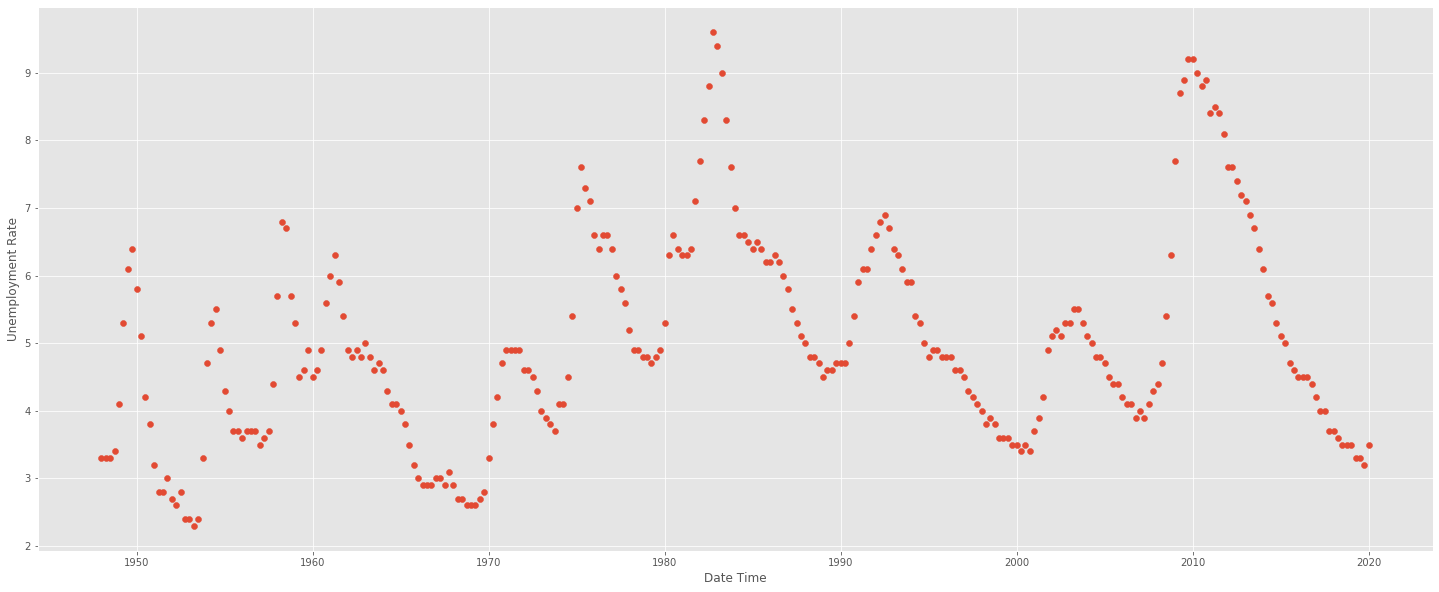

In [12]:
from matplotlib.pyplot import figure
figure (figsize = (25, 10))
plt.scatter(X, y)
plt.xlabel("Date Time")
plt.ylabel("Unemployment Rate")

In [13]:
df = unemployment[["unemployment_rate", "date_1"]]

In [14]:
forecast_col = "unemployment_rate"

In [15]:
forecast_out = int(math.ceil(0.01*len(df)))

In [16]:
df["label"] = df[forecast_col].shift(-forecast_out)

In [17]:
print(df.count())

unemployment_rate    289
date_1               289
label                286
dtype: int64


In [18]:

X = np.array(df.drop(["label", "date_1"],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [19]:
df.dropna(inplace = True)
y = np.array(df["label"])
y = np.array(df["label"])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
clf = svm.SVR("poly", degree =1)
clf.fit(X_train, y_train)

C:\Users\stroh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
accuracy = clf.score(X_test, y_test)

In [23]:
# what is exciting is I believe forecast out's units is in quarters so this could predict almost a year out ideally

print(accuracy)
print (f"Forecast out is = {forecast_out}")

0.6052220267118131
Forecast out is = 3


In [24]:
forecast_set = clf.predict(X_lately)

In [25]:
print(forecast_set, accuracy, forecast_out)

[3.45555564 3.45555564 3.27777787] 0.6052220267118131 3


In [26]:
df["Forecast"] = np.nan

In [27]:
last_quarter = df.iloc[-1].name
last_unix = last_quarter.timestamp()
one_quarter = 3*(2628000)
next_unix = last_unix + one_quarter

In [28]:
for i in forecast_set:
    next_quarter = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_quarter
    df.loc[next_quarter] = [np.nan for _ in range(len(df.columns)-1)] + [i]

C:\Users\stroh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Attempting to set identical left == right == 1 results in singular transformations; automatically expanding.
  


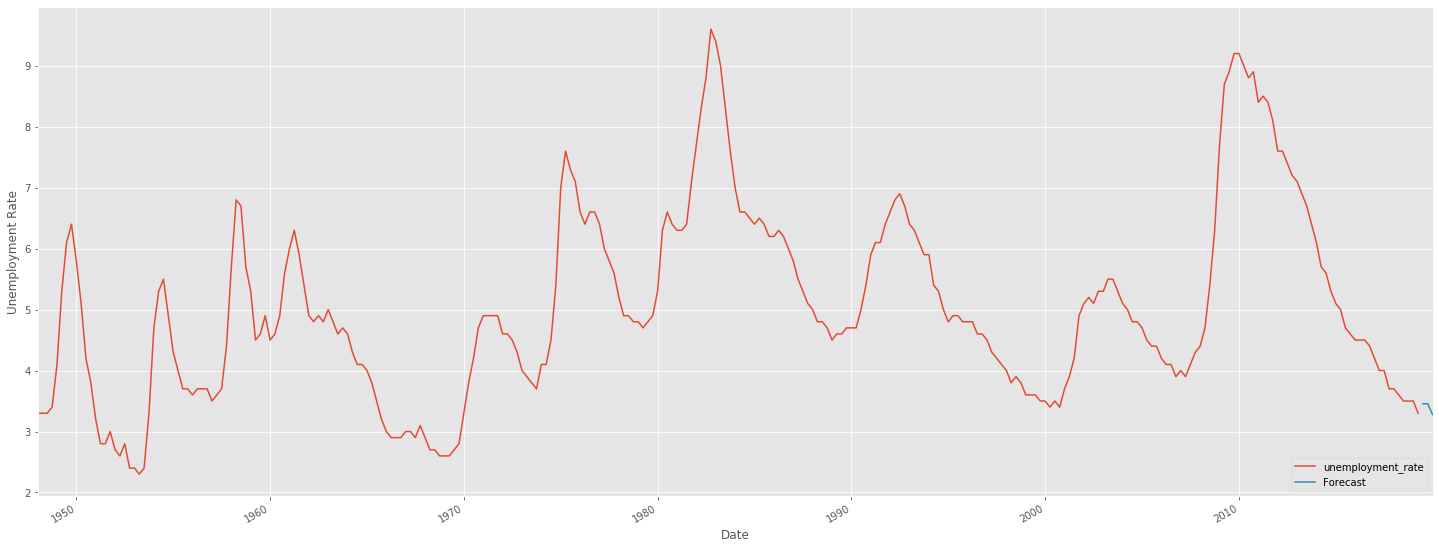

In [38]:
figure (figsize = (25, 10))
plt.xlim(left=1)
df["unemployment_rate"].plot()
df["Forecast"].plot()
plt.legend(loc=4)
# plt.xlim(2000, 2020)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")

plt.show()

,unemployment_rate,date.1
date,,
2019-01-01,3.5,1/1/2019
2019-04-01,3.3,4/1/2019
2019-07-01,3.3,7/1/2019
2019-10-01,3.2,10/1/2019
2020-01-01,3.5,1/1/2020
